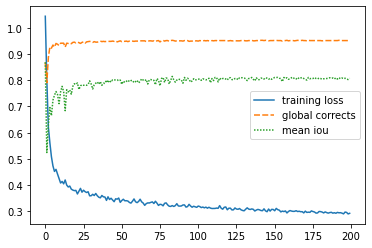

In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

"""
    Read the output result and generate the list of 
    1) epochs
    2) training_losses 
    3) learning_rates
    4) global corrects
"""

result = open('results20221023-180858unet.txt' ,'r')
line = result.readline()
epochs = []
training_losses = []
learning_rates = []
global_corrects = []

IoUs = []
IoU0s = []
IoU1s = []
mean_IoUs = []

epoch = float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", line)[0])
epochs.append(epoch)

line = result.readline()
training_loss = float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", line)[0])
training_losses.append(training_loss)

line = result.readline()
learning_rate = float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", line)[0])
learning_rates.append(learning_rate)

line = result.readline()
line = result.readline()
global_correct = float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", line)[0])
global_corrects.append(global_correct)


line = result.readline()
IoU = eval(re.findall(r"\[.+,.+\]", line)[0])
IoU0 = float(IoU[0])
IoU1 = float(IoU[1])
IoU0s.append(IoU0)
IoU1s.append(IoU1)

line = result.readline()
mean_IoU =float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", line)[0])
mean_IoUs.append(mean_IoU)

while line:
    line = result.readline()
    if 'epoch' in line:
        epoch = float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", line)[0])
        epochs.append(epoch)

        line = result.readline()
        training_loss = float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", line)[0])
        training_losses.append(training_loss)

        line = result.readline()
        learning_rate = float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", line)[0])
        learning_rates.append(learning_rate)

        line = result.readline()
        line = result.readline()
        global_correct = float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", line)[0])
        global_corrects.append(global_correct)


        line = result.readline()
        IoU = eval(re.findall(r"\[.+,.+\]", line)[0])
        IoU0 = float(IoU[0])
        IoU1 = float(IoU[1])
        IoU0s.append(IoU0)
        IoU1s.append(IoU1)

        line = result.readline()
        line = result.readline()
        mean_IoU =float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", line)[0])
        mean_IoUs.append(mean_IoU)

plot = {}
plot['training loss'] = training_losses
global_corrects = [float(i) for i in global_corrects]
plot['global corrects'] = np.asarray(global_corrects)/100
# plot['IoU0s'] = np.asarray(IoU0s)/100
# plot['IoU1s'] = np.asarray(IoU1s)/100
plot['mean iou'] = np.asarray(mean_IoUs)/100

sns.lineplot(data=plot)

# print(epochs)
# print(training_losses)
# print(global_corrects)
# print(IoU0s)
# print(IoU1s)
# print(mean_IoUs)
max_arg = np.argmax(mean_IoUs)
print(f"Maximum IoU is {mean_IoU[max_arg]}, maximum IoU0 is {IoU0s[max_arg]},  maximum IoU1 is {IoU1s[max_arg]}, ACCis {global_corrects[max_arg]},")
result.close()


